In [1]:
import timeit
import numpy as np
import pandas as pd
from functools import partial
import matplotlib.pyplot as plt

from skimage.exposure import histogram
import pyclesperanto_prototype as proto
import pyclesperanto as cle

cle.select_device()
cle.set_wait_for_kernel_to_finish(True)

proto.select_device()
proto.set_wait_for_kernel_finish(True)

sizes = np.arange(1, 200, 10)

warmup_iter = 1
eval_iter = 3

seed_value = 42

In [2]:
def mb_to_bytes(mb:int = 1) -> int:
    return mb * 1024 * 1024

def shape_from_elements(bytes:int) -> tuple:
    elements = bytes / 4
    shape = int(np.power(elements, 1/3))
    return (shape, shape, shape)

def generate_random_image(size:int = 128) -> np.ndarray:
    """
    Generates a random image of given size and sigma.
    """
    shape = shape_from_elements(mb_to_bytes(size))
    return np.random.rand(shape[0], shape[1], shape[2]).astype(np.float32)

def benchmark_function(target_function, operation:str, framework:str) -> pd.DataFrame:
    """
    Tests a function on a couple of image sizes and returns times taken for processing.
    """
    np.random.seed(seed_value)
    benchmark_data = []
    for size in sizes:
        # make new data
        image = generate_random_image(size)
        size_mb = image.size * image.itemsize / 1024 / 1024
        # bind target function to given image
        partial_function = partial(target_function, image)
        # warmup       
        _ = timeit.timeit(partial_function, number=warmup_iter)
        # measure execution time
        time_in_s = timeit.timeit(partial_function, number=eval_iter)
        
        print(f"Processing {image.shape} of {size_mb} Mb with {framework}... {time_in_s} s")

        # store results
        benchmark_data.append(pd.DataFrame({"benchmark": operation, "framework": framework, "size": size_mb, "time": time_in_s}, index=[0]))
    return pd.concat(benchmark_data)

# Histogram

### Pyclesperanto

In [3]:
def pycle_function(image):
    cle.histogram(input_image=image)

In [4]:
pycle_benchmark_data = benchmark_function(pycle_function, "histogram", "pyclesperanto")

Processing (63, 63, 63) of 0.9538536071777344 Mb with pyclesperanto... 0.01050314700000854 s
Processing (142, 142, 142) of 10.922576904296875 Mb with pyclesperanto... 0.04600054299999101 s
Processing (176, 176, 176) of 20.796875 Mb with pyclesperanto... 0.07399849699999095 s
Processing (201, 201, 201) of 30.97763442993164 Mb with pyclesperanto... 0.09493716899999072 s
Processing (220, 220, 220) of 40.618896484375 Mb with pyclesperanto... 0.10618262200000572 s
Processing (237, 237, 237) of 50.78145217895508 Mb with pyclesperanto... 0.13781016199999385 s
Processing (251, 251, 251) of 60.3227653503418 Mb with pyclesperanto... 0.1620146729999874 s
Processing (265, 265, 265) of 70.99008560180664 Mb with pyclesperanto... 0.14915767200000118 s
Processing (276, 276, 276) of 80.202392578125 Mb with pyclesperanto... 0.15476436599999488 s
Processing (287, 287, 287) of 90.17907333374023 Mb with pyclesperanto... 0.18180788600000142 s
Processing (298, 298, 298) of 100.95059204101562 Mb with pyclespe

### Prototype

In [5]:
def prototype_function(image):
    proto.histogram(source=image)
    

In [6]:
prototype_benchmark_data = benchmark_function(prototype_function, "histogram", "prototype")

Processing (63, 63, 63) of 0.9538536071777344 Mb with prototype... 0.01680083700000523 s
Processing (142, 142, 142) of 10.922576904296875 Mb with prototype... 0.05078759500003116 s
Processing (176, 176, 176) of 20.796875 Mb with prototype... 0.07049927399998523 s
Processing (201, 201, 201) of 30.97763442993164 Mb with prototype... 0.11031466000002865 s
Processing (220, 220, 220) of 40.618896484375 Mb with prototype... 0.12024660899999162 s
Processing (237, 237, 237) of 50.78145217895508 Mb with prototype... 0.15569026299999678 s
Processing (251, 251, 251) of 60.3227653503418 Mb with prototype... 0.18670620000000326 s
Processing (265, 265, 265) of 70.99008560180664 Mb with prototype... 0.16903002199995854 s
Processing (276, 276, 276) of 80.202392578125 Mb with prototype... 0.17883518299998968 s
Processing (287, 287, 287) of 90.17907333374023 Mb with prototype... 0.20296642499999962 s
Processing (298, 298, 298) of 100.95059204101562 Mb with prototype... 0.21382391399998824 s
Processing (

### Skimage

In [7]:
def skimage_function(image):
    h, bc = histogram(image)

In [8]:
skimage_benchmark_data = benchmark_function(skimage_function, "histogram", "scikit-image")

Processing (63, 63, 63) of 0.9538536071777344 Mb with scikit-image... 0.006891009000014492 s
Processing (142, 142, 142) of 10.922576904296875 Mb with scikit-image... 0.07137406499998633 s
Processing (176, 176, 176) of 20.796875 Mb with scikit-image... 0.1353950619999864 s
Processing (201, 201, 201) of 30.97763442993164 Mb with scikit-image... 0.197926912000014 s
Processing (220, 220, 220) of 40.618896484375 Mb with scikit-image... 0.277945093000028 s
Processing (237, 237, 237) of 50.78145217895508 Mb with scikit-image... 0.34873335599996835 s
Processing (251, 251, 251) of 60.3227653503418 Mb with scikit-image... 0.40844034000002694 s
Processing (265, 265, 265) of 70.99008560180664 Mb with scikit-image... 0.4793353960000104 s
Processing (276, 276, 276) of 80.202392578125 Mb with scikit-image... 0.5406298929999593 s
Processing (287, 287, 287) of 90.17907333374023 Mb with scikit-image... 0.6124999479999929 s
Processing (298, 298, 298) of 100.95059204101562 Mb with scikit-image... 0.685200

# Results

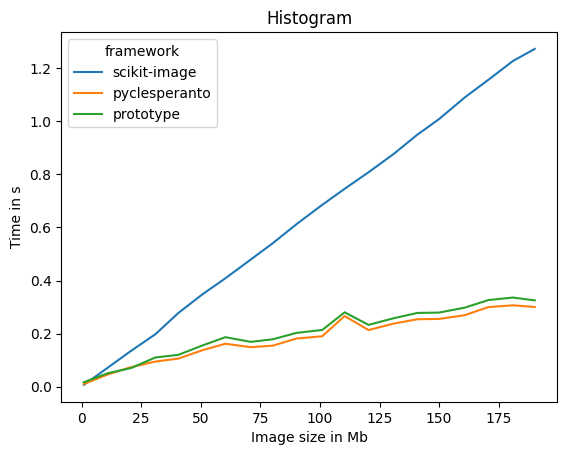

In [9]:
import seaborn as sns

bench = pd.concat([skimage_benchmark_data, pycle_benchmark_data, prototype_benchmark_data])

sns.lineplot(data=bench, x="size", y="time", hue="framework")
plt.title("Histogram")
plt.xlabel("Image size in Mb")
plt.ylabel("Time in s")
plt.show()